<a href="https://colab.research.google.com/github/namans-git/res-paper-du/blob/main/variable_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler

In [16]:
from google.colab import files
uploaded = files.upload()

Saving Front.xlsx to Front.xlsx


In [21]:
df = pd.read_excel('Front.xlsx')
df = df.iloc[:, 3:5]

In [22]:
df.head()#the features we're working with

,Grades,Exam duration (Sec)
0,93.33,390
1,80.00,726
2,80.00,666
3,46.67,478
4,80.00,946


In [23]:
# scaling the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# converting the numpy array into a pandas DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=['Grades','exam_dur'])

### KMeans

In [25]:
km = KMeans(n_clusters = 4)
km

KMeans(n_clusters=4)

In [26]:
y_predicted = km.fit_predict(df_scaled[['Grades','exam_dur']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 1, 0, 1, 3, 0, 0, 0, 2, 2, 0, 2, 1, 1, 3, 1, 1, 1, 2, 2, 2,
       1, 3, 1, 1, 3, 3, 0, 2, 1, 1, 3, 3, 1, 1, 1, 1, 1, 0, 1, 3, 1, 1,
       0], dtype=int32)

In [27]:
df_scaled['cluster_k_four'] = y_predicted

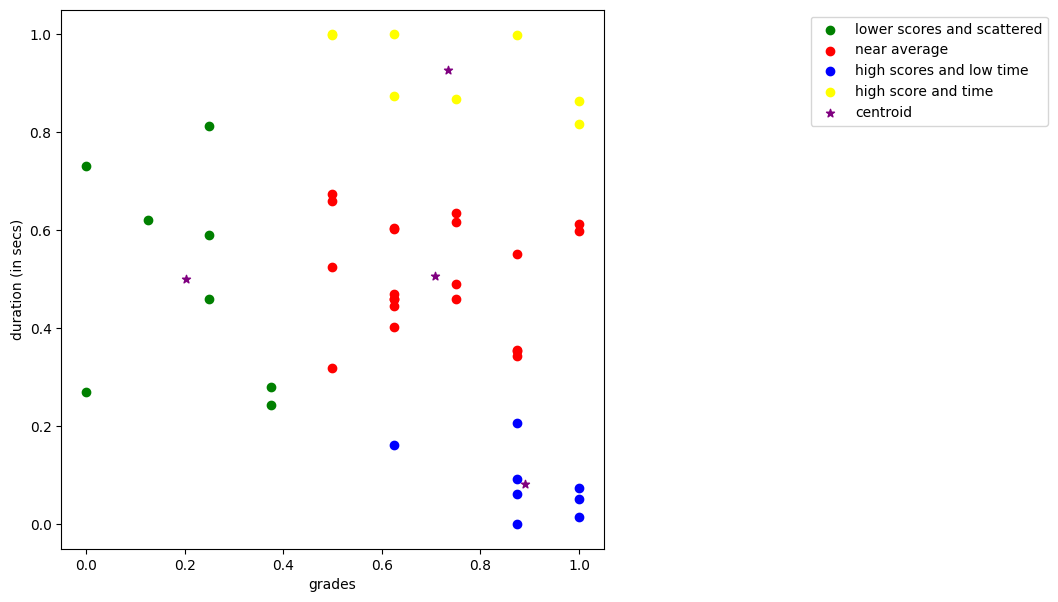

In [37]:
df1 = df_scaled[df_scaled.cluster_k_four==0]
df2 = df_scaled[df_scaled.cluster_k_four==1]
df3 = df_scaled[df_scaled.cluster_k_four==2]
df4 = df_scaled[df_scaled.cluster_k_four==3]

plt.figure(figsize=(7,7))

plt.scatter(df1['Grades'],df1['exam_dur'],color='green',label='lower scores and scattered')
plt.scatter(df2['Grades'],df2['exam_dur'],color='red',label='near average')
plt.scatter(df3['Grades'],df3['exam_dur'],color='blue',label='high scores and low time')
plt.scatter(df4['Grades'],df4['exam_dur'],color='yellow',label='high score and time')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('grades')
plt.ylabel('duration (in secs)')
plt.legend()
plt.legend(loc="upper center", bbox_to_anchor=(1.6,1), ncol=1)

###### The techniques for feature selection in machine learning can be broadly classified into the following categories:

Supervised Techniques: These techniques can be used for labeled data, and are used to identify the relevant features for increasing the efficiency of supervised models like classification and regression.

Unsupervised Techniques: These techniques can be used for unlabeled data.

A. Filter methods

B. Wrapper methods

C. Embedded methods

D. Hybrid methods

### Feature Selection
Filter methods pick up the intrinsic properties of the features measured via univariate statistics.
1. Information gain(one of the filter methods)

keyword-reduction in entropy

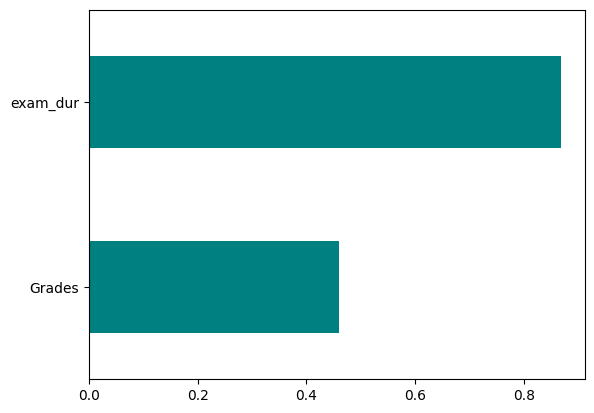

In [38]:
from sklearn.feature_selection import mutual_info_classif

X = df_scaled.iloc[:,0:2]  #independent columns
y = df_scaled.iloc[:,-1]   #target column i.e cluster

importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances, df_scaled.columns[0:len(df_scaled.columns)-1])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

###### 2. Feature importance

[0.33516699 0.66483301]


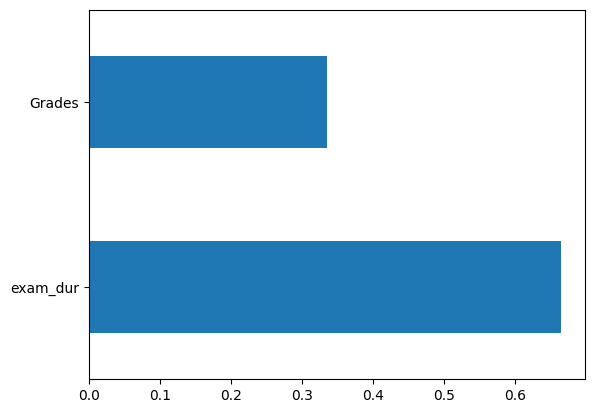

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(2).plot(kind='barh')
plt.show()

3.Correlation Matrix with Heatmap

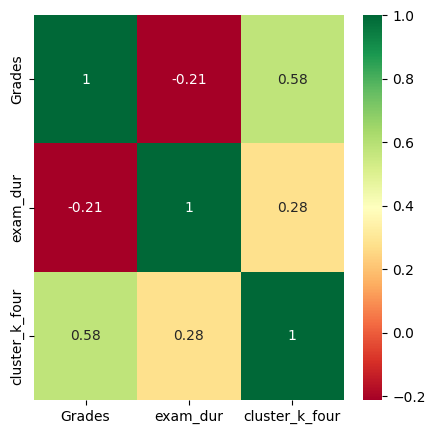

In [40]:
import seaborn as sns
# get correlations of each features in dataset
corrmat = df_scaled.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
# plot heat map
g=sns.heatmap(df_scaled[top_corr_features].corr(),annot=True,cmap="RdYlGn")

basically, the feature relates with the cluster variable the most is a more important feature